## Норма
Вам нужно посчитать средние нормы матриц n×n для каждого n из диапазона. После если вы рассмотрите отношения норм, то у вас получатся функции f(n). Они у вас будут полиномами. И в каждом таком полиноме нужно определить его степень. Это уже нужно вносить в табличку.

По сути это будет показывать как у вас соотносятся нормы в целом для произвольного n. При этом я бы хотел, чтобы вы могли объяснить из того, что я рассказывал на лекции, почему получаются именно такие соотношения.

рассматриваем такие типы матриц, как:

Фробениусова норма (евклидова норма для матриц).

Норма L1 (максимальная столбцовая сумма).

Норма L2 (спектральная норма).

Норма L∞ (максимальная строчная сумма).

Масштабированная Фробениусова норма.

Максимальный элемент матрицы, умноженный на размерность.


In [ ]:
import numpy as np
from numpy.linalg import norm
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import itertools

def gen_mtr(n):
    return np.random.rand(n, n) #равномерное распределение

def polynom(x, *coeff):
    return sum(coef * x**i for i, coef in enumerate(coeff))

def compute_norms(mtr, n):
    fro = np.linalg.norm(mtr, 'fro')
    l1 = np.linalg.norm(mtr, 1)
    l2 = np.linalg.norm(mtr, 2)
    linf = np.linalg.norm(mtr, np.inf)
    n2_fro = (n**2) * fro
    n_max = n * np.max(mtr)
    return fro, l1, l2, linf, n2_fro, n_max


fro_norms = []
l1_norms = []
l2_norms = []
linf_norms = []
n2_fro_norms = []
n_max_norms = []

n_range = np.arange(10, 101, 2)
num = 100

for n in n_range:
    mtr = [gen_mtr(n) for _ in range(num)]
    norms = np.array([compute_norms(mtr, n) for mtr in mtr])
    fro_norms.append(np.mean(norms[:, 0]))
    l1_norms.append(np.mean(norms[:, 1]))
    l2_norms.append(np.mean(norms[:, 2]))
    linf_norms.append(np.mean(norms[:, 3]))
    n2_fro_norms.append(np.mean(norms[:, 4]))
    n_max_norms.append(np.mean(norms[:, 5]))



# ratios = [avg_norms[i+1] / avg_norms[i] for i in range(len(avg_norms)-1)]
# x_data = np.array(n_range[:-1])
# y_data = np.array(ratios)

# poly_degree = 2
# popt, _ = curve_fit(polynom, x_data, y_data, p0=[1]*(poly_degree+1))

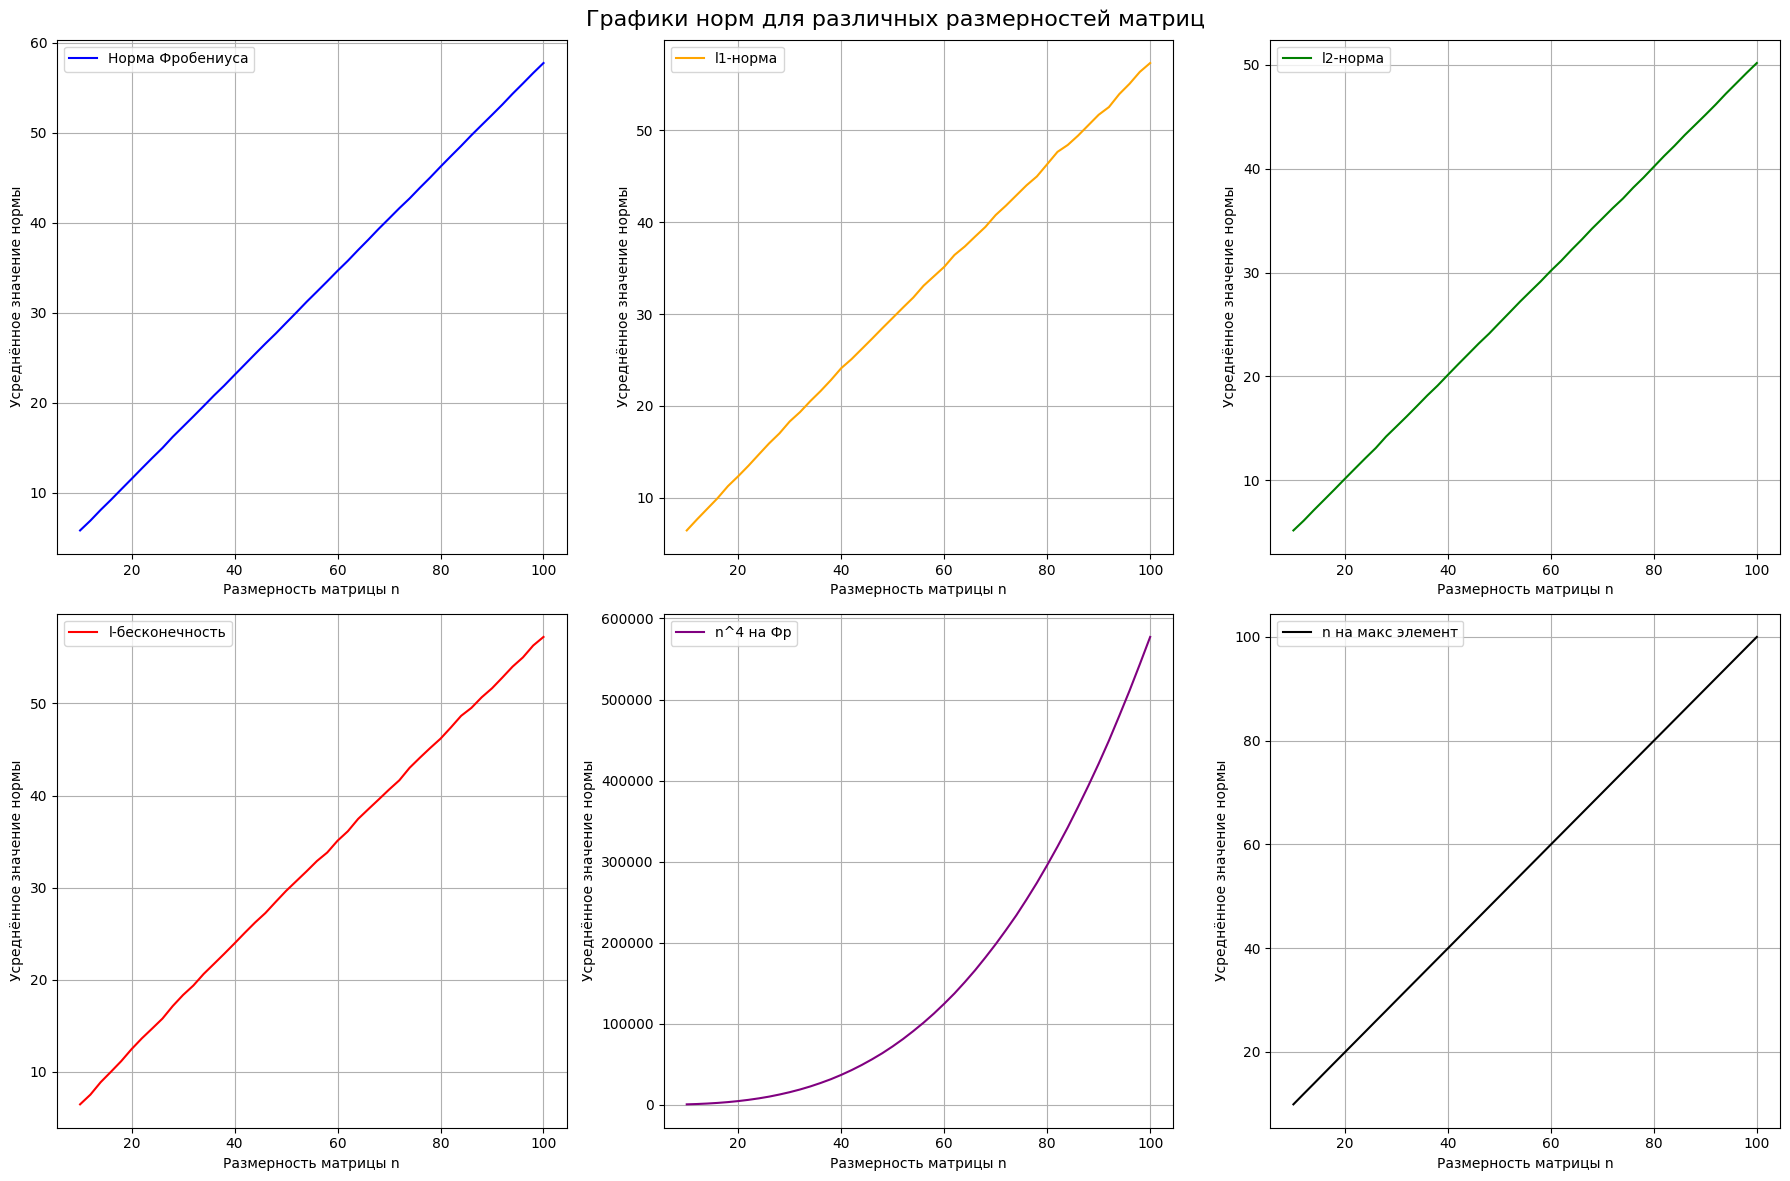

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Графики норм для различных размерностей матриц', fontsize=16)

axes[0, 0].plot(n_range, fro_norms, label='Норма Фробениуса', color='blue')
axes[0, 0].set_xlabel('Размерность матрицы n')
axes[0, 0].set_ylabel('Усреднённое значение нормы')
axes[0, 0].legend()
axes[0, 0].grid()

axes[0, 1].plot(n_range, l1_norms, label='l1-норма', color='orange')
axes[0, 1].set_xlabel('Размерность матрицы n')
axes[0, 1].set_ylabel('Усреднённое значение нормы')
axes[0, 1].legend()
axes[0, 1].grid()

axes[0, 2].plot(n_range, l2_norms, label='l2-норма', color='green')
axes[0, 2].set_xlabel('Размерность матрицы n')
axes[0, 2].set_ylabel('Усреднённое значение нормы')
axes[0, 2].legend()
axes[0, 2].grid()

axes[1, 0].plot(n_range, linf_norms, label='l-бесконечность', color='red')
axes[1, 0].set_xlabel('Размерность матрицы n')
axes[1, 0].set_ylabel('Усреднённое значение нормы')
axes[1, 0].legend()
axes[1, 0].grid()

axes[1, 1].plot(n_range, n2_fro_norms, label='n^4 на Фр', color='purple')
axes[1, 1].set_xlabel('Размерность матрицы n')
axes[1, 1].set_ylabel('Усреднённое значение нормы')
axes[1, 1].legend()
axes[1, 1].grid()

axes[1, 2].plot(n_range, n_max_norms, label='n на макс элемент', color='black')
axes[1, 2].set_xlabel('Размерность матрицы n')
axes[1, 2].set_ylabel('Усреднённое значение нормы')
axes[1, 2].legend()
axes[1, 2].grid()

plt.tight_layout()
plt.show()

In [ ]:
norm_names = ['Fro', 'l1', 'l2', 'l_inf', 'n^2 * Fro', 'n * max']
data = {
    'Fro': np.array(fro_norms),
    'l1': np.array(l1_norms),
    'l2': np.array(l2_norms),
    'l_inf': np.array(linf_norms),
    'n^2 * Fro': np.array(n2_fro_norms),
    'n * max': np.array(n_max_norms)}
log_n_range = np.log(n_range)
pairs = list(itertools.combinations(range(len(norm_names)), 2))
num_pairs = len(pairs)

num_pairs

15

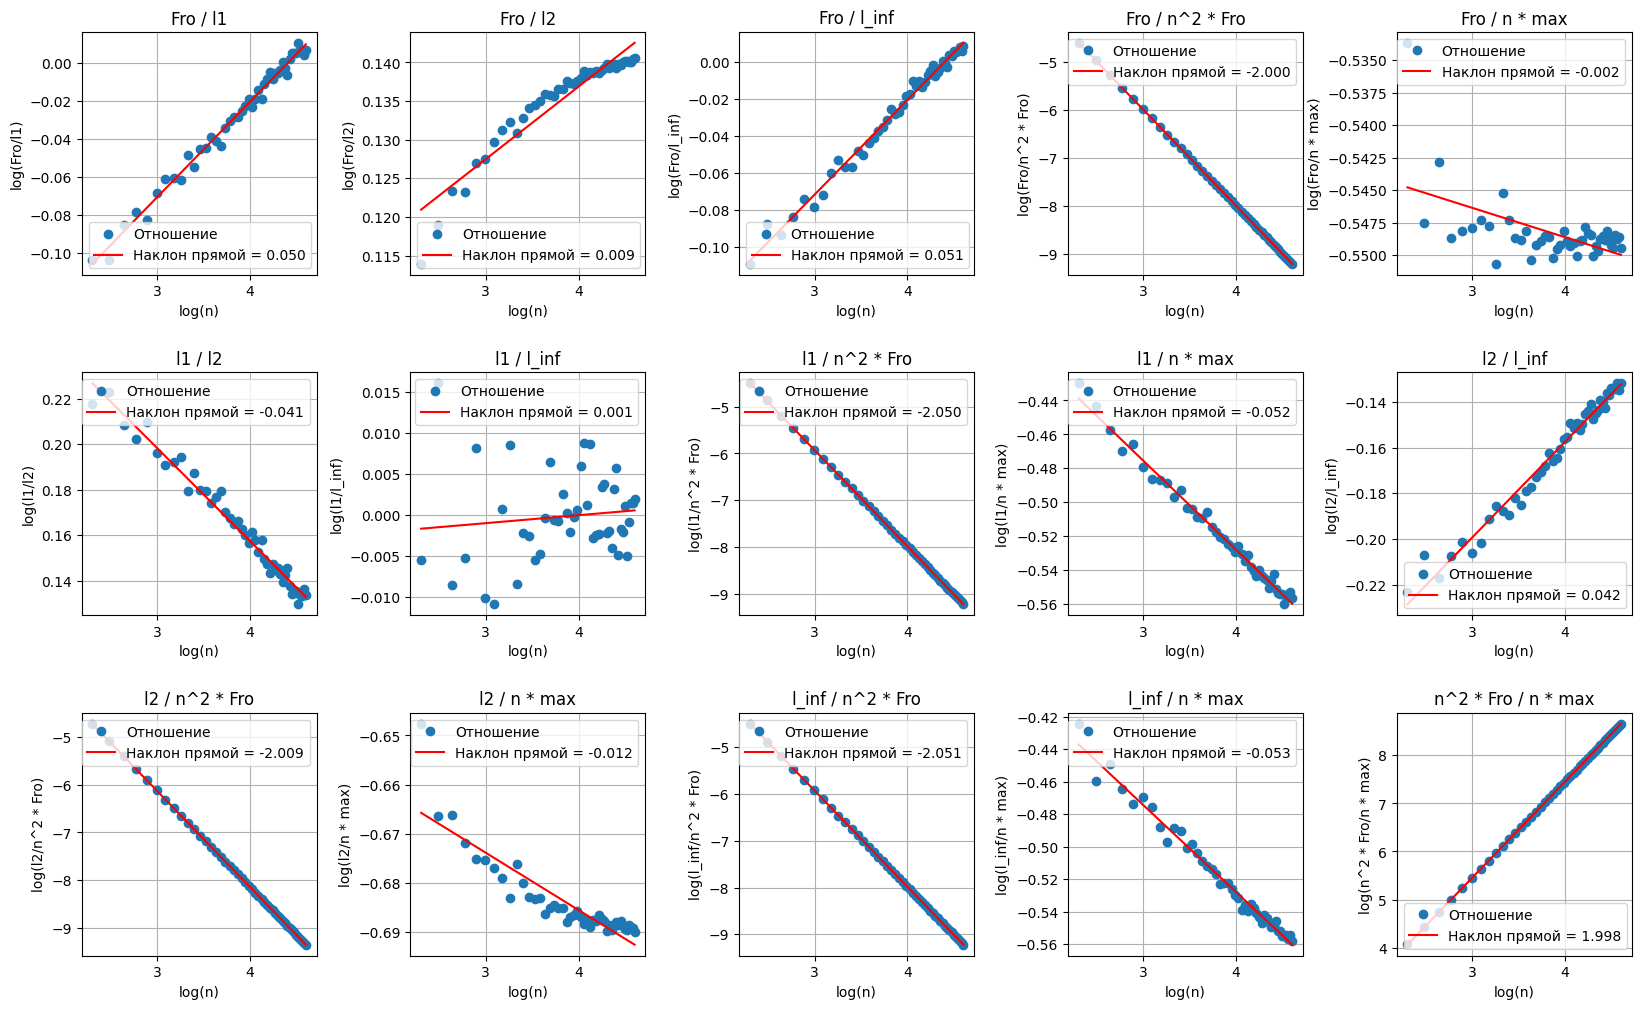

In [ ]:
fig, axs = plt.subplots(3, 5, figsize=(20, 12))
axs = axs.flatten()
plt.subplots_adjust(wspace=0.4, hspace=0.4)

coeffs = {}

for ax, (i, j) in zip(axs, pairs):
    norm1 = norm_names[i]
    norm2 = norm_names[j]

    ratio = data[norm1] / data[norm2]
    log_ratio = np.log(ratio)
    #линейная аппроксимация в логарифмической шкале
    coeff, bias = np.polyfit(log_n_range, log_ratio, 1)
    coeffs[f"{norm1}/{norm2}"] = coeff

    ax.plot(log_n_range, log_ratio, 'o', label='Отношение')
    ax.plot(log_n_range, coeff * log_n_range + bias, 'r-', label=f'Наклон прямой = {coeff:.3f}')
    ax.set_xlabel('log(n)')
    ax.set_ylabel(f'log({norm1}/{norm2})')
    ax.set_title(f'{norm1} / {norm2}')
    ax.legend()
    ax.grid()
plt.show()

In [ ]:
print("Найденные коэффициенты наклона для каждого отношения:")
for pair, coeff in coeffs.items():
    print(f"{pair}: {coeff:.2f}")

Найденные коэффициенты наклона для каждого отношения:
Fro/l1: 0.05
Fro/l2: 0.01
Fro/l_inf: 0.05
Fro/n^2 * Fro: -2.00
Fro/n * max: -0.00
l1/l2: -0.04
l1/l_inf: 0.00
l1/n^2 * Fro: -2.05
l1/n * max: -0.05
l2/l_inf: 0.04
l2/n^2 * Fro: -2.01
l2/n * max: -0.01
l_inf/n^2 * Fro: -2.05
l_inf/n * max: -0.05
n^2 * Fro/n * max: 2.00


## №3: Эксперимент с LU-разложением для матриц со случайным обнулением элементов
1. Разложение. Реализуйте алгоритм LU-разложения матрицы A.
2. Проверка корректности. После получения матриц L и U перемножьте их
(т.е. вычислите L · U) и сравните результат с исходной матрицей A, используя,
например, норму Фробениуса:
Относительная ошибка =
∥A − L · U∥ / ∥A∥.
3. Генерация матриц с обнулением. Напишите функцию, которая генерирует квадратную матрицу A размера n × n, где каждый элемент обнуляется с
заданной вероятностью p.
4. Экспериментальное исследование. Для набора значений p (например, от
0 до 1 с шагом 0.02) проведите серию экспериментов (например, 1000 попыток для каждого p) и посчитайте число неудачных попыток выполнения LUразложения (случаи, когда алгоритм не может быть выполнен).
5. Анализ результатов. Постройте гистограмму или график, показывающий
зависимость количества неудачных попыток от p.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# def check_minors(A):
#     n = A.shape[0]
#     for k in range(1, n + 1):
#         minor = A[:k, :k]
#         if np.linalg.det(minor) == 0:
#             return False
#     return True

def lu_decomp(A, eps = 0.0000001):
    n = A.shape[0]
    L = np.eye(n)
    U = np.zeros_like(A)

    for i in range(n):
        for j in range(i, n):
            U[i, j] = A[i, j] - np.dot(L[i, :i], U[:i, j])
        if U[i, i] == 0:
            return None, None
        for j in range(i + 1, n):
            L[j, i] = (A[j, i] - np.dot(L[j, :i], U[:i, i])) / U[i, i]

    return L, U

# def gen_mtr_zeros(n, p):
#     while True:
#         A = np.random.rand(n, n) * 10
#         mask = np.random.rand(n, n) < p
#         A[mask] = 0
#         if check_minors(A):
#             return A

def gen_mtr_zeros(n, p):
    A = np.random.rand(n, n) * 10
    mask = np.random.rand(n, n) < p
    A[mask] = 0
    return A


In [ ]:
n = 5
p_val = np.arange(0, 1.02, 0.02)
num_trials = 1000
fail_cnt = []

for p in p_val:
  fails = 0
  for i in range(num_trials):
      A = gen_mtr_zeros(n, p)
      L, U = lu_decomp(A)
      if L is None:
          fails += 1
  fail_cnt.append(fails)

fail_cnt

[933,
 936,
 936,
 911,
 934,
 936,
 912,
 928,
 926,
 941,
 930,
 926,
 954,
 942,
 947,
 947,
 949,
 957,
 943,
 957,
 948,
 964,
 969,
 966,
 972,
 977,
 987,
 977,
 988,
 987,
 993,
 989,
 994,
 996,
 1000,
 1000,
 1000,
 1000,
 997,
 999,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000]

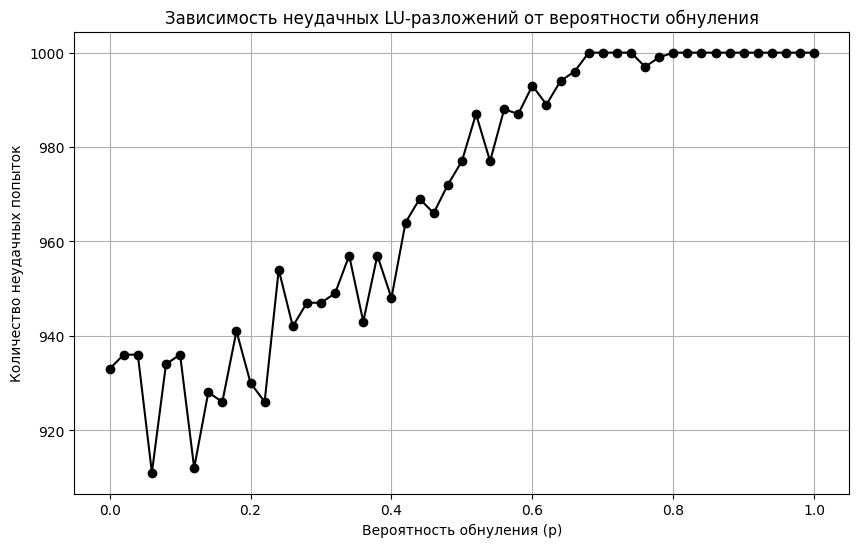

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(p_val, fail_cnt, marker='o', color='black')
plt.xlabel('Вероятность обнуления (p)')
plt.ylabel('Количество неудачных попыток')
plt.title('Зависимость неудачных LU-разложений от вероятности обнуления')
plt.grid(True)
plt.show()

Рассмотрим задачу нахождения точек пересечения кривой Безье 3-го порядка
и прямой ax + by + c = 0. Кривая Безье задаётся параметрически уравнением:

B(t) = (1 − t)
3P0 + 3(1 − t)
2
t P1 + 3(1 − t)t
2 P2 + t
3P3, t ∈ [0, 1],

где P0, P1, P2, P3 — опорные точки. Прямая задаётся уравнением:
ax + by + c = 0.

Подставив параметрические выражения кривой Безье x(t) и y(t) в уравнение
прямой, получаем полином от переменной t. Задача нахождения точек пересечения сводится к поиску корней этого полинома на отрезке [0, 1].

В качестве конкретного примера, пусть:

P0 = (0, −1), P1 = (1, 2), P2 = (2, −2), P3 = (3, 1),

а для прямой выбраны коэффициенты:

a = 0, b = 1, c = 0.

Требуется:

(a) Реализовать QR-алгоритм для нахождения собственных чисел, который
будет использован для поиска корней полученного полинома.

(b) Применить QR-алгоритм для вычисления корней полинома, полученного
при подстановке параметрических уравнений кривой Безье в уравнение
прямой.

(c) Определить и визуализировать точки пересечения кривой Безье и прямой
на графике.

(d) Путём изменения уравнения кривой и опорных точек постараться получить все возможные варианты количества точек пересечения и возможных
корней полинома. Понять как по корням полинома можно установить взаимное положение прямой и кривой Безье.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

# QR-алгоритм
def qr(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for k in range(min(m - 1, n)):

        x = np.array(R[k:, k])
        w = x.copy()
        w[0] = x[0] + np.sign(x[0]) * np.linalg.norm(x)

        w = w / np.linalg.norm(w)

        H = np.eye(m)
        H[k:, k:] = H[k:, k:] - 2 * np.outer(w, w)


        R = H @ R
        Q = Q @ H.T

    return Q, R

In [ ]:
def eigenvalues_2x2(matrix):

    a, b = matrix[0]
    c, d = matrix[1]

    discriminant =(a + d)**2 - 4 * (a * d - b * c)

    lambda1 = (a + d + cmath.sqrt(discriminant)) / 2
    lambda2 = (a + d - cmath.sqrt(discriminant)) / 2

    if discriminant > 0:
      return lambda1.real, lambda2.real
    elif discriminant == 0:
      return lambda1.real

    return lambda1, lambda2

In [ ]:
def qr_stop(A):
  flag = False
  for i in range(A.shape[0] - 1):
    if np.abs(A[i+1,i]) >= 1e-8 and flag == False:
      flag = True
    elif flag == True and np.abs(A[i+1,i]) >= 1e-7:
      return False
    elif flag == True and np.abs(A[i+1,i]) < 1e-7:
      flag = False
  return True

In [20]:
def qr_algorithm(A, iter=10000, err = 1e-7):

  B = A.copy()
  lambdas = []
  for _ in range(iter):
    q, r = qr(A)
    A1 = r @ q
    A = A1.copy()

    if qr_stop(A):
      print(A)
      i = 0
      while i < A.shape[0]:
        if i == A.shape[0] - 1 or np.abs(A[i + 1,i]) <= err:
          lambdas.append(A[i, i])
          i += 1
        else:
          lambdas.append(eigenvalues_2x2(A[i:i+2, i:i+2]))
          i += 2
      return lambdas


  for i in range(A.shape[0]-1):
      # if np.abs(A[i + 1,i]) < 1e-8:
      #   lambdas.append(A[i, i])
      #   print(A[i, i])
      # else:
      #   lambdas.append(eigenvalues_2x2(A[i:i+2, i:i+2]))
      lambdas.append(eigenvalues_2x2(A[i:i+2, i:i+2]))
  return lambdas


In [25]:
# Параметры кривой Безье
p0 = (0, -1)
p1 = (1, 2)
p2 = (2, -2)
p3 = (3, 1)
a, b, c = 0, 1, 0  # Прямая y = 0

def f(t):
  return a * ((1-t)**3 * p0[0] + 3 * (1-t)**2 * t * p1[0] + 3 * (1-t) * t**2 * p2[0] + t**3 * p3[0])\
  + b * ((1-t)**3 * p0[1] + 3 * (1-t)**2 * t * p1[1] + 3 * (1-t) * t**2 * p2[1] + t**3 * p3[1]) + c

a0 = a * (p3[0] - 3 * p2[0] + 3 * p1[0] - p0[0]) + b * (p3[1] - 3 * p2[1] + 3 * p1[1] - p0[1])
a1 = a * (3 * p2[0] - 6 * p1[0] + 3 * p0[0]) + b * (3 * p2[1] - 6 * p1[1] + 3 * p0[1])
a2 = a * (3 * p1[0] - 3 * p0[0]) + b * (3 * p1[1] - 3 * p0[1])
a3 = a * p0[0] + b * p0[1] + c

c1 = a1/a0
c2 = a2/a0
c3 = a3/a0

A = np.array([
        [-c1, -c2, -c3],
        [1, 0, 0],
        [0, 1, 0]

    ])


ans = qr_algorithm(A)
ans = np.array([item for sublist in ans for item in (sublist if isinstance(sublist, tuple) else [sublist])])
unique_arr = []
for value in ans:
    if not any(np.isclose(value, unique_value, atol=1e-3) for unique_value in unique_arr):
        unique_arr.append(value)

ans = np.array(unique_arr)
ans = ans[(ans >= 0) & (ans <= 1)]

print(ans)

[[ 8.27745175e-01 -9.25230674e-01  4.50809503e-01]
 [ 1.48188653e-04  4.99581843e-01 -1.62619995e+00]
 [-1.12672302e-25  3.67473728e-08  1.72672982e-01]]
[0.82732684 0.50000018 0.17267298]


In [22]:
print(np.linalg.eigvals(A))

[0.82732684 0.5        0.17267316]


In [24]:
print(np.roots([1, c1, c2, c3]))

[0.82732684 0.5        0.17267316]


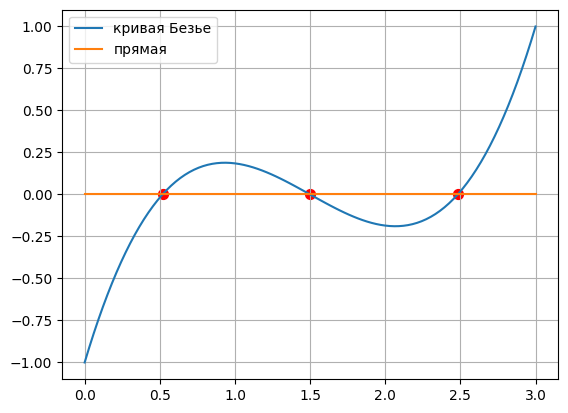

In [26]:
def bezier(p0, p1, p2, p3, t):

    x = (1-t)**3 * p0[0] + 3 * (1-t)**2 * t * p1[0] + 3 * (1-t) * t**2 * p2[0] + t**3 * p3[0]
    y = (1-t)**3 * p0[1] + 3 * (1-t)**2 * t * p1[1] + 3 * (1-t) * t**2 * p2[1] + t**3 * p3[1]
    return x, y

t = np.linspace(0, 1, 100)

x_l = np.linspace(0, 3, 300)

y_l = (-c - a * x_l) / b if b != 0 else (-c / a) * np.ones_like(x_l)
x_b, y_b = bezier(p0, p1, p2, p3, t)
plt.plot(x_b, y_b, label = 'кривая Безье')
plt.plot(x_l, y_l, label = 'прямая')
for t in ans:
  x, y = bezier(p0, p1, p2, p3, t)
  plt.scatter(x, y, s=50, c = 'r')
plt.grid()
plt.legend()

In [27]:
def bezier_plot(p0, p1, p2, p3, a, b, c):
  a0 = a * (p3[0] - 3 * p2[0] + 3 * p1[0] - p0[0]) + b * (p3[1] - 3 * p2[1] + 3 * p1[1] - p0[1])
  a1 = a * (3 * p2[0] - 6 * p1[0] + 3 * p0[0]) + b * (3 * p2[1] - 6 * p1[1] + 3 * p0[1])
  a2 = a * (3 * p1[0] - 3 * p0[0]) + b * (3 * p1[1] - 3 * p0[1])
  a3 = a * p0[0] + b * p0[1] + c

  if a0 != 0:
    c1 = a1/a0
    c2 = a2/a0
    c3 = a3/a0

    A = np.array([
            [-c1, -c2, -c3],
            [1, 0, 0],
            [0, 1, 0]

        ])
  elif a0 == 0 and a1 != 0:
    c1 = a2/a1
    c2 = a3/a1
    A = np.array([
            [-c1, -c2],
            [1, 0]

        ])
    print(1)
  ans = qr_algorithm(A)
  ans = np.array([item for sublist in ans for item in (sublist if isinstance(sublist, tuple) else [sublist])])
  unique_arr = []
  for value in ans:
      if not any(np.isclose(value, unique_value, atol=1e-3) for unique_value in unique_arr):
          unique_arr.append(value)
  ans = np.array(unique_arr)
  print(ans)
  ans = ans[(ans >= 0) & (ans <= 1)]
  #print(ans, np.roots([1, c1, c2, c3]), np.linalg.eigvals(A))

  t = np.linspace(0, 2, 100)
  x_l = np.linspace(0, 3, 300)
  y_l = (-c - a * x_l) / b if b != 0 else (-c / a) * np.ones_like(x_l)
  x_b, y_b = bezier(p0, p1, p2, p3, t)

  plt.plot(x_b, y_b, label = 'кривая Безье')
  plt.plot(x_l, y_l, label = 'прямая')
  for t in ans:
    x, y = bezier(p0, p1, p2, p3, t)
    plt.scatter(x, y, s=50, c = 'r')
  plt.grid()
  plt.legend()

[[ 1.14079216e+00 -8.14082462e-01 -6.92452025e-01]
 [ 7.80795008e-06  2.95681651e-01  1.37805755e+00]
 [-3.70465656e-28 -4.21481754e-08  6.35261871e-02]]
[1.14078464 0.29568917 0.06352619]


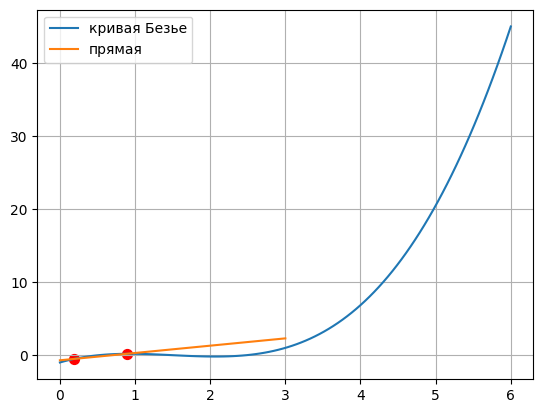

In [15]:
# 2 точки пересечения
p0 = np.array([0, -1])
p1 = np.array([1, 2])
p2 = np.array([2, -2])
p3 = np.array([3, 1])

a = 1
b = -1
c = -0.7
bezier_plot(p0, p1, p2, p3, a, b, c)

1
[[ 0.66666667  1.33333333]
 [-0.33333333  0.33333333]]
[0.5+0.64549722j 0.5-0.64549722j]


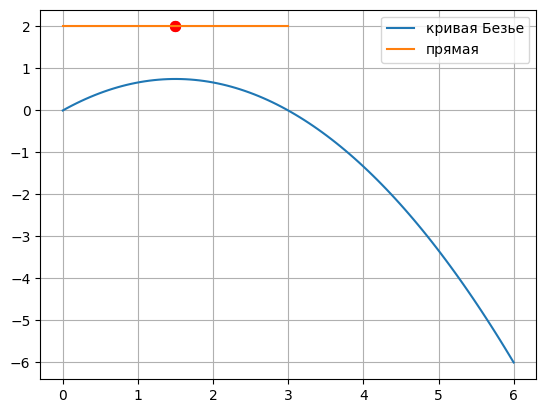

In [19]:
# Случай 3: 0 точек пересечения
P0 = np.array([0, 0])
P1 = np.array([1, 1])
P2 = np.array([2, 1])
P3 = np.array([3, 0])
a, b, c = 0, 1, -2 # Прямая y = 0
bezier_plot(P0, P1, P2, P3, a, b, c)

## Задание №3

**Задача 1.**  
Пусть \( A \in \mathbb{R}^{m \times n} \), где \( m < n \). Приведите алгоритм вычисления разложения  
\[ P^T AQ = (B \mid 0), \]  
где:  
- \((B \mid 0)\) — верхняя двухдиагональная матрица размера \( m \times n \),  
- \( P \in \mathbb{R}^{m \times m} \) и \( Q \in \mathbb{R}^{n \times n} \) — ортогональные матрицы.

**Подсказка:**  
1. С помощью матриц Хаусхолдера приведите \( A \) к виду:
   \[
   \begin{pmatrix}
   \times & \times & 0      & \ldots & 0      & 0      & 0      & 0      & \ldots & 0 \\
   0      & \times & \times & \ldots & 0      & 0      & 0      & 0      & \ldots & 0 \\
   \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
   0      & 0      & 0      & \ldots & \times & \times & 0      & 0      & \ldots & 0 \\
   0      & 0      & 0      & \ldots & 0      & \times & \times & 0      & \ldots & 0
   \end{pmatrix}.
   \]
2. Затем вынесите элемент \((m, m+1)\) вверх по \((m+1)\)-му столбцу, применяя справа вращения Гивенса.

In [4]:
import numpy as np
import cmath

import numpy as np

def upper_bidiag(A, eps = 1e-8):
    m, n = A.shape
    P = np.eye(m)
    Q = np.eye(n)
    B = A.copy().astype(float)

    for i in range(m):
        # Обнуление под диагональю в столбце i (Хаусхолдер слева)
        x = B[i:, i].copy()
        if np.linalg.norm(x) == 0:
            continue
        e1 = np.zeros_like(x)
        e1[0] = np.linalg.norm(x)
        u = x - e1
        u = u / np.linalg.norm(u)
        H = np.eye(m)
        H[i:, i:] -= 2 * np.outer(u, u)
        B = H @ B
        P = H @ P

        # Обнуление справа от диагонали в строке i (Хаусхолдер справа)
        if i < n-1:
            x = B[i, i+1:].copy()
            if np.linalg.norm(x) == 0:
                continue
            e1 = np.zeros_like(x)
            e1[0] = np.linalg.norm(x)
            u = x - e1
            u = u / np.linalg.norm(u)
            Hr = np.eye(n - i - 1)
            Hr -= 2 * np.outer(u, u)
            H_full = np.eye(n)
            H_full[i+1:, i+1:] = Hr
            B = B @ H_full
            Q = Q @ H_full

    # Если m < n, обработаем элемент (m-1, m) вращениями Гивенса
    if m < n:
        for i in range(m-1, -1, -1):
            if i >= n-1:
                continue
            # Сдвигаем элемент B[i, i+1] вверх
            if B[i, i+1] > eps:
                # Создаем вращение Гивенса для обнуления B[i, i+1]
                r = np.hypot(B[i, i], B[i, i+1])
                cos = B[i, i] / r
                sin = -B[i, i+1] / r
                G = np.eye(n)
                G[i, i] = cos
                G[i+1, i+1] = cos
                G[i, i+1] = sin
                G[i+1, i] = -sin
                B = B @ G.T
                Q = Q @ G.T

    return P.T, Q.T, B

# Пример использования
m, n = 3, 5
A = np.random.rand(m, n)
P, Q, B = upper_bidiag(A)

print("P^T A Q = \n", np.round(P.T @ A @ Q, 4))
print("\nB:\n", np.round(B, 4))

P^T A Q = 
 [[ 1.2049  0.1847  0.48    0.8329 -0.714 ]
 [ 0.3227  0.2807  0.8141  0.7202 -0.1962]
 [-0.3721 -0.3105  0.2308  0.3845 -0.1045]]

B:
 [[-1.0979  1.1554  0.6161  0.     -0.    ]
 [-0.6895  0.296   0.7669  0.5018 -0.    ]
 [-0.0441  0.0189 -0.1142  0.6569  0.    ]]


In [5]:
import numpy as np

def householder_reflection(v):
    """Матрица Хаусхолдера для зануления хвоста вектора v."""
    v = v.copy()
    norm_v = np.linalg.norm(v)
    if norm_v == 0:
        return np.eye(len(v))
    v[0] += np.sign(v[0]) * norm_v
    v /= np.linalg.norm(v)
    H = np.eye(len(v)) - 2 * np.outer(v, v)
    return H

def givens_rotation(a, b):
    """Матрица вращения Гивенса для зануления элемента b."""
    if b == 0:
        return np.eye(2)
    r = np.hypot(a, b)
    c = a / r
    s = -b / r
    G = np.array([[c, -s],
                  [s,  c]])
    return G

def bidiagonalize(A):
    m, n = A.shape
    P = np.eye(m)
    Q = np.eye(n)
    A = A.copy()

    # Шаг 1 — Хаусхолдеры слева
    for i in range(m):
        H = np.eye(m)
        H_i = householder_reflection(A[i:, i])
        H[i:, i:] = H_i
        A = H @ A
        P = P @ H

    # Шаг 2 — Гивенсы справа
    for i in range(min(m, n)):
        # Хаусхолдер слева: зануляем столбец
        H = np.eye(m)
        H_i = householder_reflection(A[i:, i])
        H[i:, i:] = H_i
        A = H @ A
        P = P @ H

        if i < n-2:
            # Хаусхолдер справа: зануляем строку
            G = np.eye(n)
            G_i = householder_reflection(A[i, i+1:])
            G[i+1:, i+1:] = G_i
            A = A @ G
            Q = Q @ G

    # Округление и зануление мелких элементов
    A[np.abs(A) < 1e-6] = 0
    A = np.round(A, 2)
    P[np.abs(P) < 1e-6] = 0
    P = np.round(P, 2)
    Q[np.abs(Q) < 1e-6] = 0
    Q = np.round(Q, 2)

    return P, A, Q


# Пример:
A = np.random.randn(3, 5)
P, B, Q = bidiagonalize(A)

print("P^T A Q:")
print(P.T @ A @ Q)
print("B:")
print(B)

P^T A Q:
[[-1.23285386e+00  1.33023873e+00  3.18200668e-03 -3.31596660e-04
  -4.72428111e-03]
 [ 3.47783505e-03 -1.53519931e+00 -1.60778691e+00 -6.89061322e-03
   1.51291422e-03]
 [-3.72309794e-03  7.09240358e-03  2.43093049e-01  1.99621363e+00
   9.50257842e-04]]
B:
[[-1.23  1.32  0.    0.    0.  ]
 [ 0.   -1.53 -1.6   0.    0.  ]
 [ 0.    0.    0.23  2.01  0.  ]]


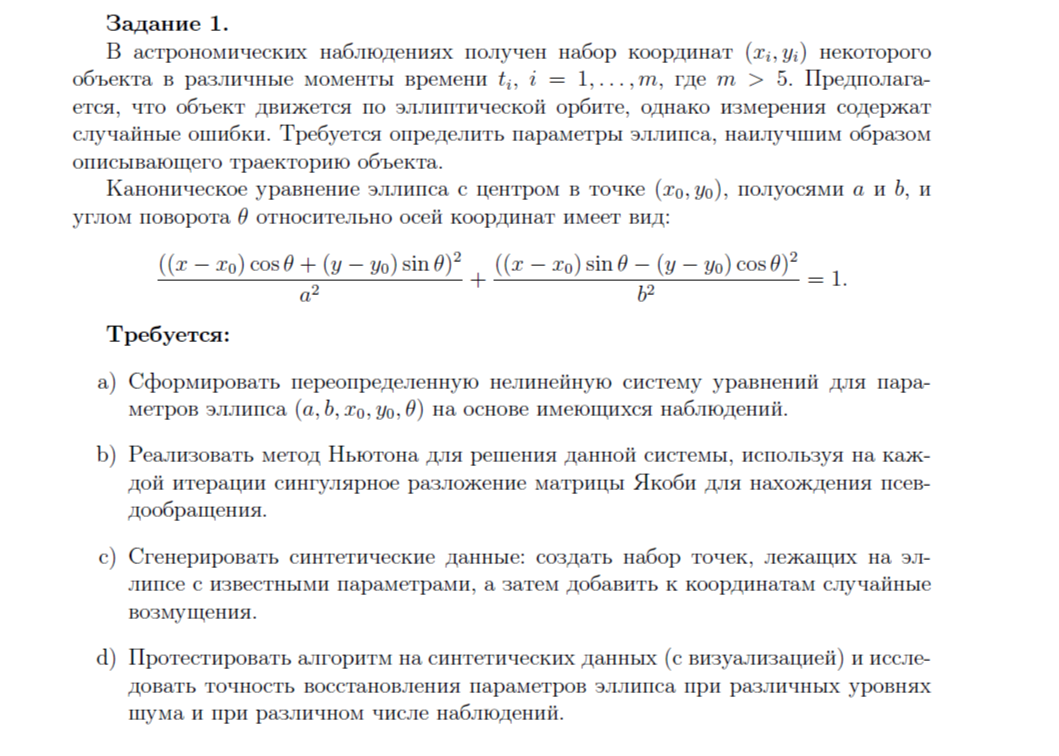


## Задание 1

В астрономических наблюдениях получен набор координат \((x_i, y_i)\) некоторого объекта в различные моменты времени \(t_i\), \(i = 1,\ldots,m\), где \(m > 5\). Предполагается, что объект движется по эллиптической орбите, однако измерения содержат случайные ошибки. Требуется определить параметры эллипса, наилучшим образом описывающего траекторию объекта.

Каноническое уравнение эллипса с центром в точке \((x_0, y_0)\), полуосями \(a\) и \(b\), и углом поворота \(\theta\) относительно осей координат имеет вид:

\[
\frac{\left[(x - x_0) \cos\theta + (y - y_0) \sin\theta\right]^2}{a^2} + \frac{\left[(x - x_0) \sin\theta - (y - y_0) \cos\theta\right]^2}{b^2} = 1.
\]

**Требуется:**

a) Сформировать переопределенную нелинейную систему уравнений для параметров эллипса \((a, b, x_0, y_0, \theta)\) на основе имеющихся наблюдений.

b) Реализовать метод Ньютона для решения данной системы, используя на каждой итерации сингулярное разложение (SVD) матрицы Якоби для нахождения псевдообращения.

c) Сгенерировать синтетические данные: создать набор точек, лежащих на эллипсе с известными параметрами, а затем добавить к координатам случайные возмущения.

d) Протестировать алгоритм на синтетических данных (с визуализацией) и исследовать точность восстановления параметров эллипса при различных уровнях шума и при различном числе наблюдений.